# Central tendency analysis on the cantilever beam example

In this example we perform a central tendency analysis of a random variable Y using the various methods available. We use the cantilever beam example and show how to use the `TaylorExpansionMoments` and `ExpectationSimulationAlgorithm` classes. 

In [1]:
from __future__ import print_function
import openturns as ot

Create the random variable of interest Y=g(X).

In [2]:
mean = [50.0, 1.0, 10.0, 5.0]
dim = len(mean)
sigma = ot.Point(dim, 1.0)
R = ot.IdentityMatrix(dim)
distribution = ot.Normal(mean, sigma, R)
X = ot.RandomVector(distribution)
X.setDescription(['E', 'F', 'L', 'I'])
f = ot.SymbolicFunction(['E', 'F', 'L', 'I'], ['F*L^3/(3*E*I)'])
Y = ot.CompositeRandomVector(f, X)
Y.setDescription('Y')

## Taylor expansion

Perform taylor approximation to get the mean of Y and the importance factors.

In [3]:
taylor = ot.TaylorExpansionMoments(Y)
taylor_mean_fo = taylor.getMeanFirstOrder()
taylor_mean_so = taylor.getMeanSecondOrder()
taylor_cov = taylor.getCovariance()
taylor_if = taylor.getImportanceFactors()
print('model evaluation calls number=', f.getGradientCallsNumber())
print('model gradient calls number=', f.getGradientCallsNumber())
print('model hessian calls number=', f.getHessianCallsNumber())
print('taylor mean first order=', taylor_mean_fo)
print('taylor variance=', taylor_cov)
print('taylor importance factors=', taylor_if)

model evaluation calls number= 1
model gradient calls number= 1
model hessian calls number= 1
taylor mean first order= [1.33333]
taylor variance= [[ 2.0096 ]]
taylor importance factors= [E : 0.000353857, F : 0.884642, L : 0.079618, I : 0.0353857]


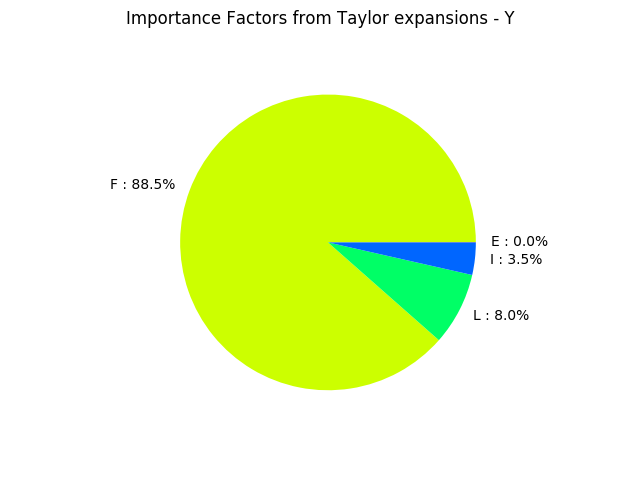

In [4]:
taylor.drawImportanceFactors()

We see that, at first order, the variable $F$ explains 88.5% of the variance of the output $Y$. On the other hand, the variable $E$ is not significant in the variance of the output: at first order, the random variable $E$ could be replaced by a constant without any change in the output variance.

## Monte-Carlo simulation

Perform a Monte Carlo simulation of Y to estimate its mean.

In [5]:
algo = ot.ExpectationSimulationAlgorithm(Y)
algo.setMaximumOuterSampling(1000)
algo.setCoefficientOfVariationCriterionType('NONE')
algo.run()
print('model evaluation calls number=', f.getEvaluationCallsNumber())
expectation_result = algo.getResult()
expectation_mean = expectation_result.getExpectationEstimate()
print('monte carlo mean=', expectation_mean, 'var=', expectation_result.getVarianceEstimate())

model evaluation calls number= 1001
monte carlo mean= [1.39543] var= [0.00271142]


## Central dispersion analysis based on a sample

Directly compute statistical moments based on a sample of Y. Sometimes the probabilistic model is not available and the study starts from the data. 

In [6]:
Y_s = Y.getSample(1000)
y_mean = Y_s.computeMean()
y_stddev = Y_s.computeStandardDeviationPerComponent()
y_quantile_95p = Y_s.computeQuantilePerComponent(0.95)
print('mean=', y_mean, 'stddev=', y_stddev, 'quantile@95%', y_quantile_95p)

mean= [1.3887] stddev= [1.61762] quantile@95% [4.21421]


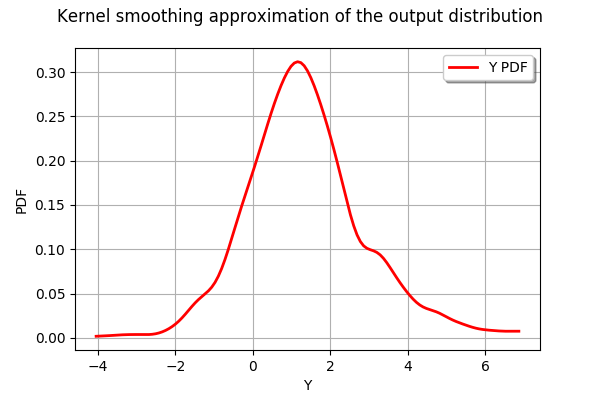

In [7]:
graph = ot.KernelSmoothing().build(Y_s).drawPDF()
graph.setTitle("Kernel smoothing approximation of the output distribution")
graph